# What is the average depreciation rate for cars of different models? #

### Import the data, dependencies, conver saledate into saleyear, and view data ###

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
str_path_file = "Data/clean_car_prices.csv"
df_clean_car_prices = pd.read_csv(str_path_file)
int_clean_car_prices_checksum = 472325
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}")

Dataframe import size 472325 rows, clean checksum is 472325, run at 2024-03-23 11:19:09.195620


In [2]:
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] > 1) ]
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] < 11) ]
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}.  Difference is only cars between 1 and 10 years old are used, inclusive")

Dataframe import size 343508 rows, clean checksum is 472325, run at 2024-03-23 11:19:09.700977.  Difference is only cars between 1 and 10 years old are used, inclusive


### Group by 'Make-Model' and 'saleyear' and calculate 'meansellingprice' ###

In [3]:
df_age_when_sold_grouped = df_clean_car_prices.groupby(['Make-Model', 'model', 'make', 'age_when_sold'])['sellingprice'].mean().reset_index()
df_age_when_sold_grouped.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped dataframe has {len(df_age_when_sold_grouped)} records.")

2024-03-23 11:19:10.009580
The df_age_when_sold_grouped dataframe has 2797 records.


In [4]:
# Calculate percentage change in mean selling price for each make-model
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped.groupby(['Make-Model'])['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_age_when_sold_grouped['Percent_change_meansellingprice'] = df_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")
print(datetime.datetime.now())
print(f"Dataframe import size {len(df_age_when_sold_grouped)} rows run at {datetime.datetime.now()}")

2024-03-23 11:19:10.062765
Dataframe import size 2213 rows run at 2024-03-23 11:19:10.062765


In [5]:
selected_models = ['f-150', 'taurus', 'titan', 'sentra', 'corolla', 'tacoma', 'c/k 2500 series','malibu']
df_age_when_sold_grouped= df_age_when_sold_grouped[df_age_when_sold_grouped['model'].isin(selected_models)]

2024-03-23 11:19:10.642208


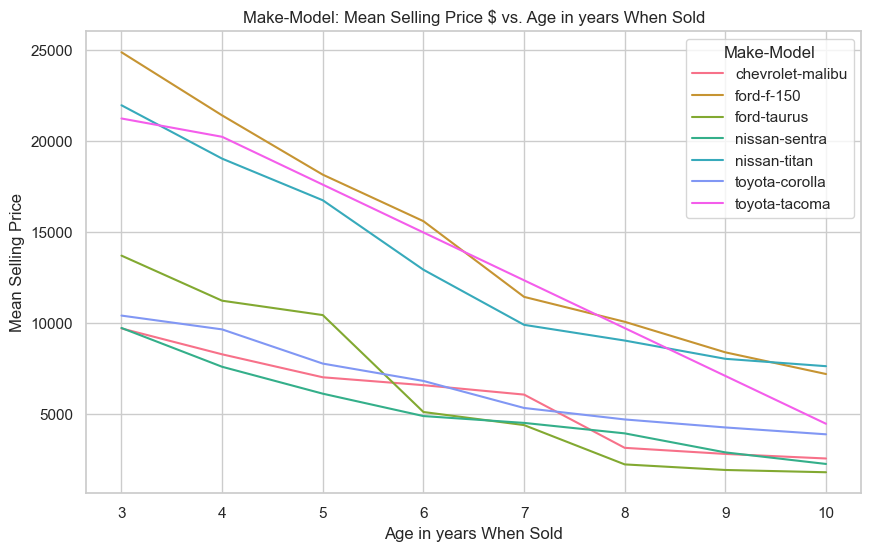

In [6]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='meansellingprice', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Mean Selling Price $ vs. Age in years When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('Mean Selling Price')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
print(datetime.datetime.now())
plt.show()

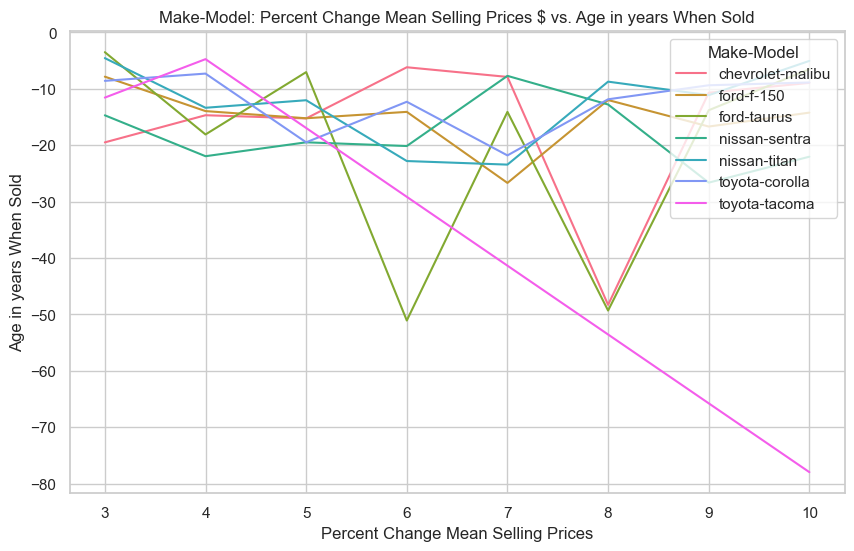

In [7]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percent Change Mean Selling Prices $ vs. Age in years When Sold')
plt.xlabel('Percent Change Mean Selling Prices')
plt.ylabel('Age in years When Sold')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
plt.show()

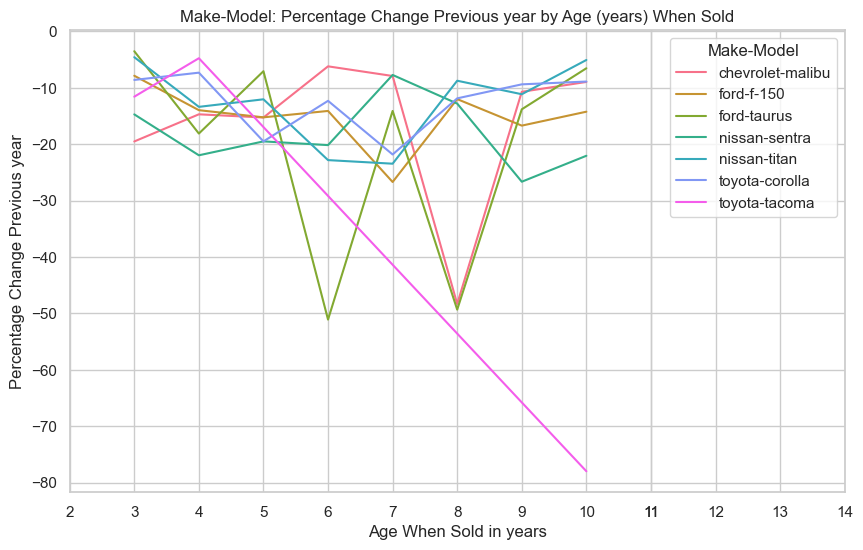

In [8]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='Make-Model', palette='husl')

# Set the title and labels
plt.title('Make-Model: Percentage Change Previous year by Age (years) When Sold')
plt.xlabel('Age When Sold in years')
plt.ylabel('Percentage Change Previous year')

# Display the plot
plt.legend(title='Make-Model', loc='upper right')
plt.xticks(list(plt.xticks()[0]) + [11, 12, 13, 14])
plt.show()

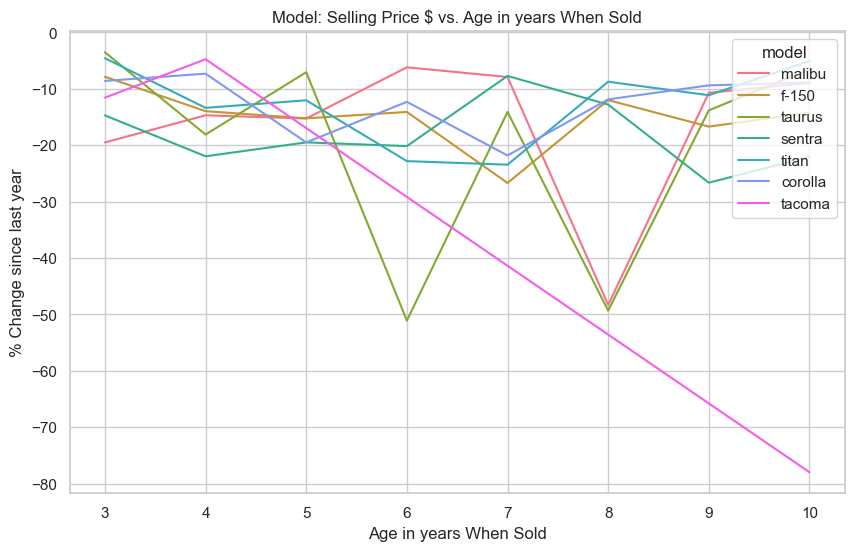

In [9]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='model', palette='husl')

# Set the title and labels
plt.title('Model: Selling Price $ vs. Age in years When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='model', loc='upper right')
plt.show()